## Macroeconomic Update: How To Love the Recovery

### Professor Timothy H. Savage, Ph.D. CRE

#### NYU Schack Institute of Real Estate

#### Faculty Director | CREFC Center for Real Estate Finance at NYU Schack

#### Faculty Coordinator | Data Analytics

#### Distinguished Fellow | NAIOP Research Foundation

# Putting the Crisis into Context: 

# Economics and Finance Bootcamp

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## A Brief History of Economics and Finance

* Political philosphy and debt markets
    * No mathematics and no graphs 
    * **No data** and no algorithms
    * Sparse equity markets


* *The Marginal Revolution*
    * Mathematics of classical thermodynamics: **equilibrium** and **disturbances**
    * Graphical description of **equilibrium**
    * Economics and finance become distinct applications

## 1929 and the Great Depression

* Policy-makers had little to **little or no data** (despite policy mistakes of the Federal Reserve and law-makers of the age)
    
    
* The Cowles Commission and the National Income and Product Accounts


* Federal Reserve now relies on **real-time data** to gauge economic activity
    * Credit card **data**
    * Smart phone **data**

## Economics and Finance in Two Graphs

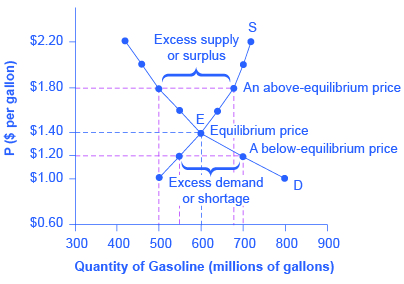

In [2]:
url = 'https://upload.wikimedia.org/wikipedia/commons/e/e1/Economics_demand_and_supply_curves.jpg'
Image(url, width=600, height=600)

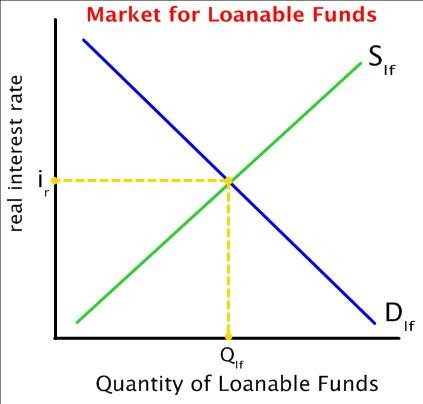

In [3]:
url = 'https://sbhshgovapmacro.files.wordpress.com/2011/04/loanable-funds-graph.jpg'
Image(url, width=500, height=500)

## The Current Economic Cycle

In [4]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

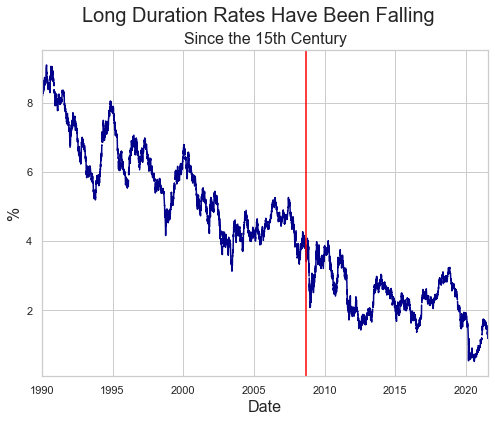

In [5]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('Since the 15th Century', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

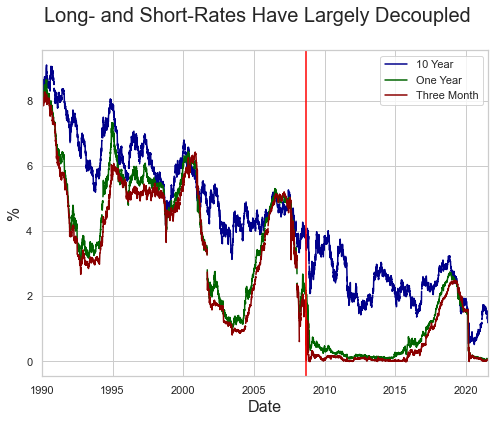

In [6]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

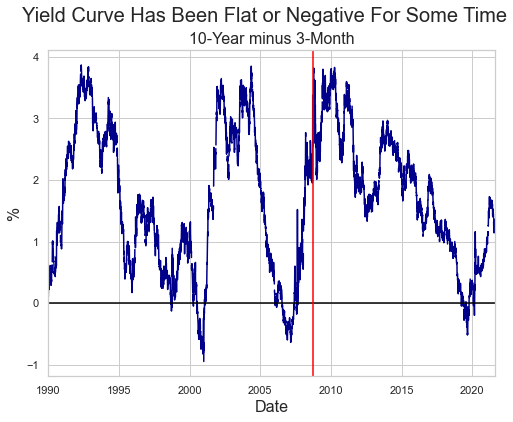

In [7]:
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve Has Been Flat or Negative For Some Time', fontsize=20)
plt.title('10-Year minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

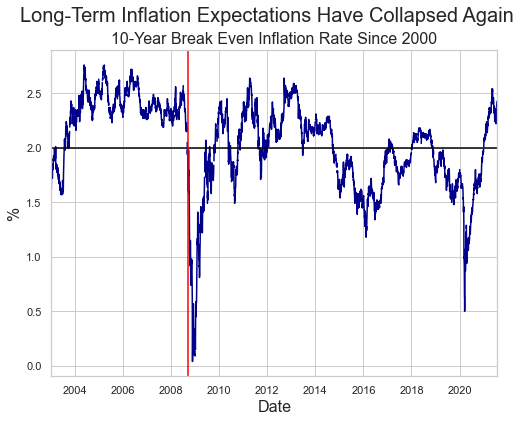

In [8]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long-Term Inflation Expectations Have Collapsed Again', fontsize=20)
plt.title('10-Year Break Even Inflation Rate Since 2000', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

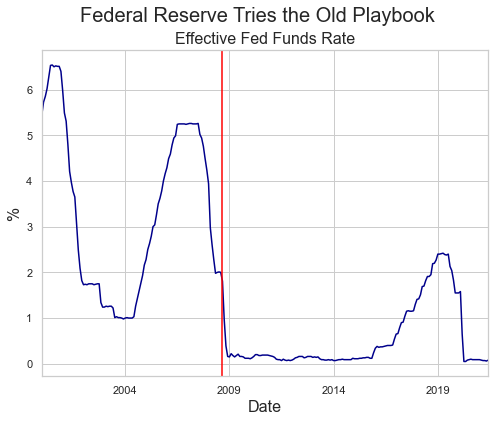

In [9]:
fed_funds = fred.get_series("FEDFUNDS", observation_start='2000-01-01')
fed_funds.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Tries the Old Playbook', fontsize=20)
plt.title('Effective Fed Funds Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

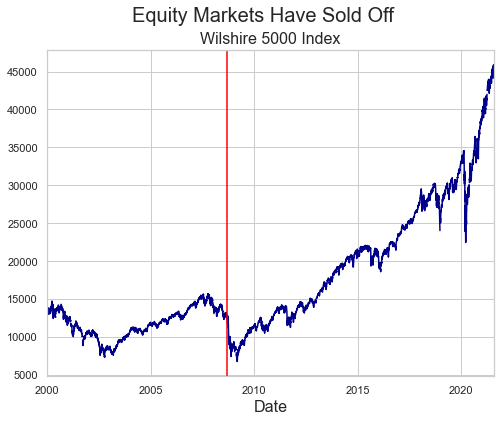

In [10]:
wilshire = fred.get_series("WILL5000PR", observation_start='2000-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Equity Markets Have Sold Off', fontsize=20)
plt.title('Wilshire 5000 Index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

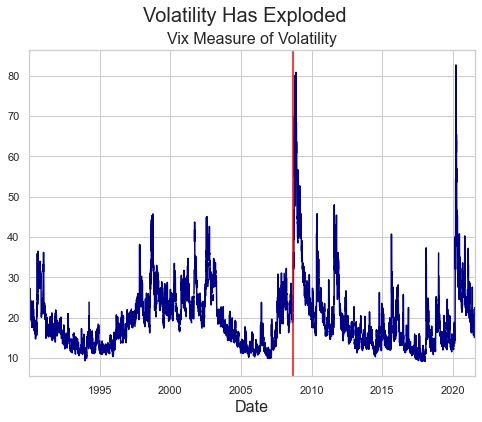

In [11]:
vix = fred.get_series("VIXCLS", observation_start='1990-01-01')
vix.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Volatility Has Exploded', fontsize=20)
plt.title('Vix Measure of Volatility', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
#plt.axvline(dt.datetime(2020, 1, 1), color='black')

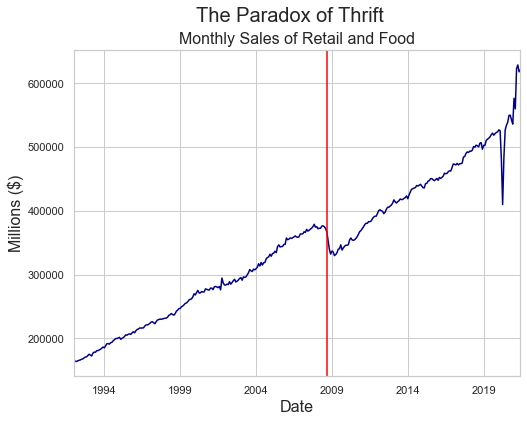

In [12]:
sales = fred.get_series("RSAFS", observation_start='1990-01-01')
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Paradox of Thrift', fontsize=20)
plt.title('Monthly Sales of Retail and Food', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

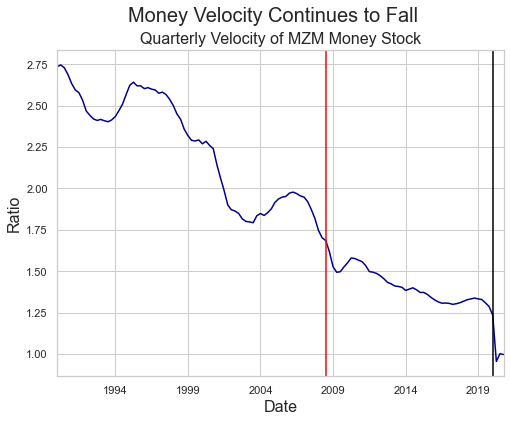

In [13]:
velocity = fred.get_series("MZMV", observation_start='1990-01-01')
velocity.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Money Velocity Continues to Fall', fontsize=20)
plt.title('Quarterly Velocity of MZM Money Stock', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Ratio', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color='black')

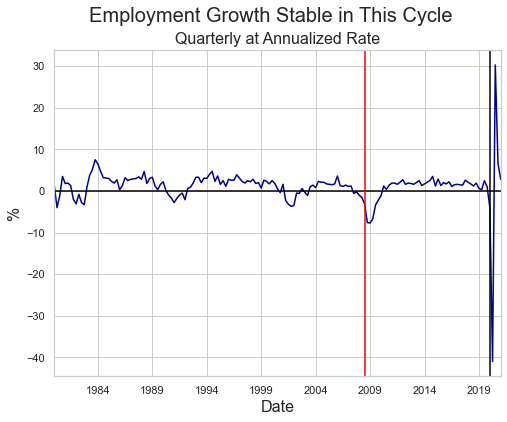

In [14]:
emp_growth = fred.get_series("PRS85006012", observation_start='1980-01-01')
emp_growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Employment Growth Stable in This Cycle', fontsize=20)
plt.title('Quarterly at Annualized Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color='black')

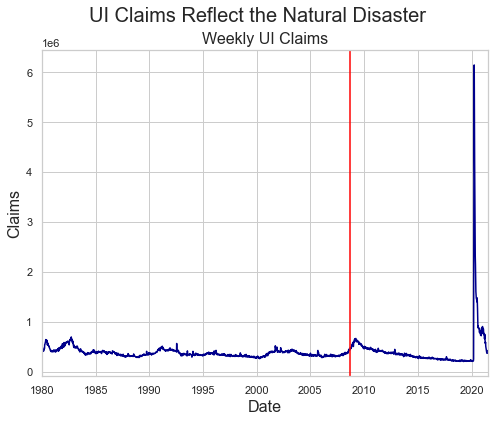

In [15]:
claims = fred.get_series("ICSA", observation_start='1980-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('UI Claims Reflect the Natural Disaster', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

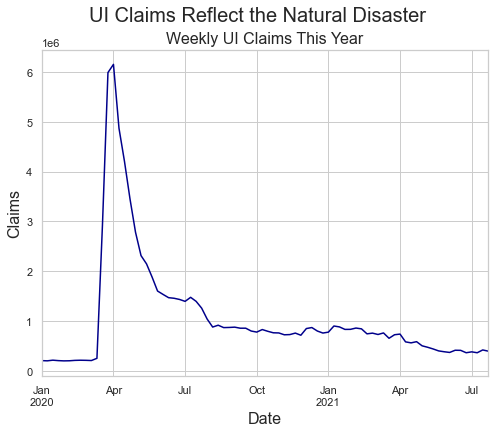

In [16]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('UI Claims Reflect the Natural Disaster', fontsize=20)
plt.title('Weekly UI Claims This Year', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

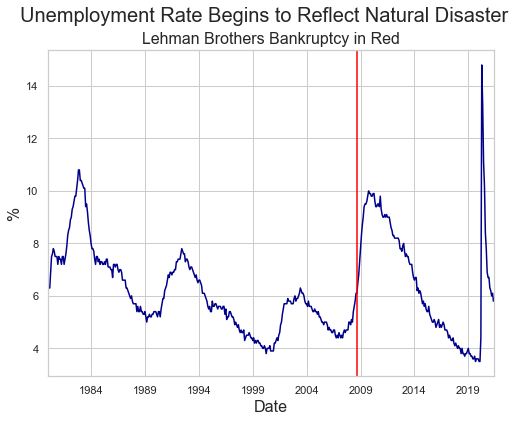

In [17]:
unemp_rate = fred.get_series("UNRATE", observation_start='1980-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Unemployment Rate Begins to Reflect Natural Disaster', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

## Economic Implications

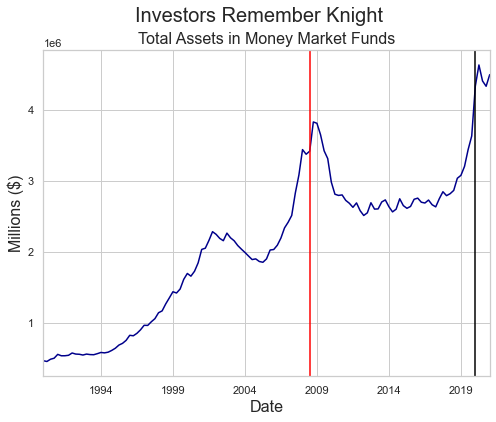

In [18]:
cash = fred.get_series("MMMFFAQ027S", observation_start='1990-01-01')
cash.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Investors Remember Knight', fontsize=20)
plt.title('Total Assets in Money Market Funds', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color='black')

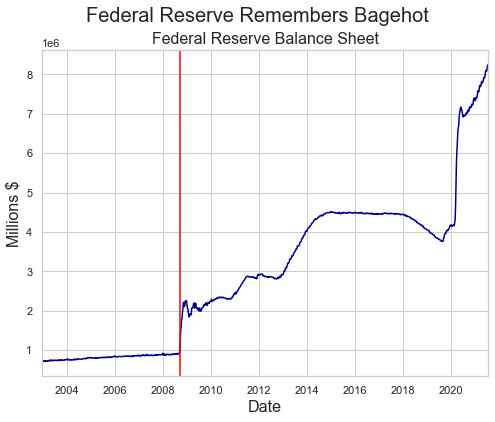

In [19]:
balance_sheet = fred.get_series("WALCL", observation_start='2000-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Remembers Bagehot', fontsize=20)
plt.title('Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions $', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

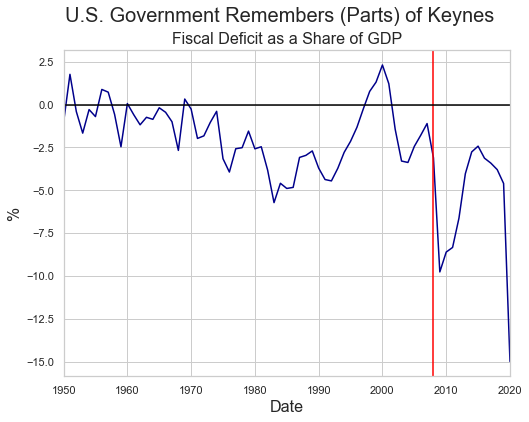

In [20]:
def_as_share = fred.get_series("FYFSGDA188S", observation_start='1950-01-01')
def_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('U.S. Government Remembers (Parts) of Keynes', fontsize=20)
plt.title('Fiscal Deficit as a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(0.0, color="black")

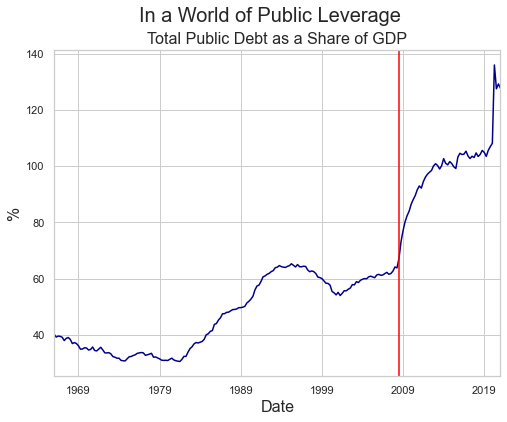

In [21]:
debt_as_share = fred.get_series("GFDEGDQ188S", observation_start='1950-01-01')
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('In a World of Public Leverage', fontsize=20)
plt.title('Total Public Debt as a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

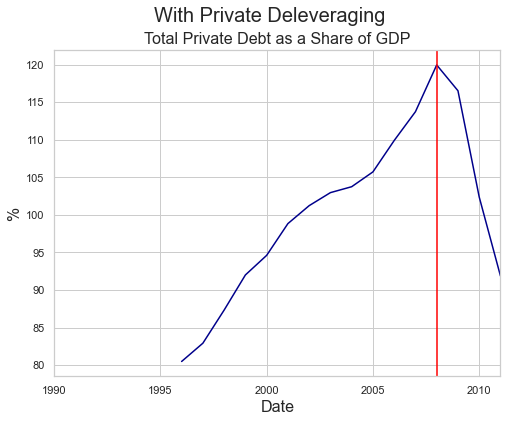

In [22]:
debt_as_share = fred.get_series("DDDM03USA156NWDB", observation_start='1950-01-01')
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('With Private Deleveraging', fontsize=20)
plt.title('Total Private Debt as a Share of GDP', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

## 1929 and Today: 
### We Have Returned to an Absence of Data

In [23]:
covid = pd.read_csv('https://covidtracking.com/api/us/daily.csv')
covid['date'] = pd.to_datetime(covid['date'], format='%Y%m%d')
covid = covid.sort_values('date')
covid['rate'] = covid['positive'] / covid['posNeg'] * 100
covid = covid.iloc[45:]

(array([18322., 18383., 18444., 18506., 18567., 18628., 18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

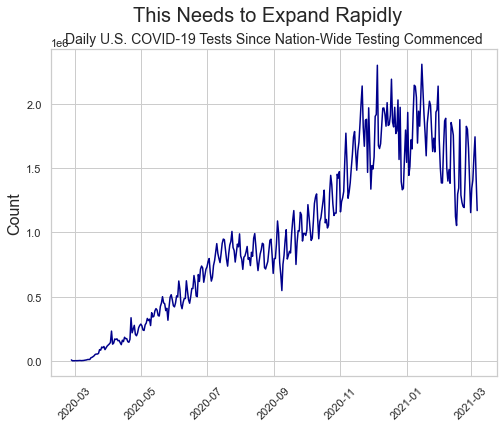

In [24]:
plt.figure(figsize=(8, 6))
plt.suptitle('This Needs to Expand Rapidly', fontsize=20)
plt.title('Daily U.S. COVID-19 Tests Since Nation-Wide Testing Commenced', fontsize=14)
plt.plot(covid['date'], covid['totalTestResultsIncrease'], color='darkblue')
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45)
# source: https://covidtracking.com/api/us/daily.csv

# Thank You

## Q&A

### Slides: https://github.com/thsavage/Macro